In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
def build_model(dropout_rate=0.3, weight_decay=1e-4):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                      kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(dropout_rate),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(dropout_rate),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [7]:
model = build_model(dropout_rate=0.3)
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 293ms/step - accuracy: 0.4226 - loss: 1.7415 - val_accuracy: 0.5891 - val_loss: 1.2497
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 282ms/step - accuracy: 0.6381 - loss: 1.0358 - val_accuracy: 0.6738 - val_loss: 0.9358
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 217s 306ms/step - accuracy: 0.7040 - loss: 0.8504 - val_accuracy: 0.7123 - val_loss: 0.8148
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.7354 - loss: 0.7475 - val_accuracy: 0.7422 - val_loss: 0.7395
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 231ms/step - accuracy: 0.7621 - loss: 0.6696 - val_accuracy: 0.7526 - val_loss: 0.7354
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.7883 - loss: 0.6064 - val_accuracy: 0.7498 - val_loss: 0.7293
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 230ms/step - accuracy: 0.8026 - loss: 0.5618 - val_accuracy: 0.7717 - val_loss: 0.6763
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.8227 -

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7982 - loss: 0.6790
Test Accuracy: 0.7971


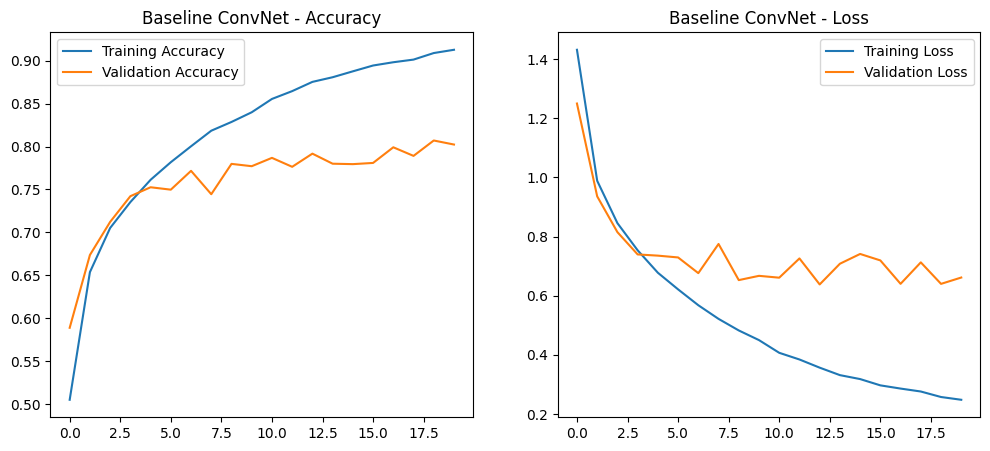

In [11]:
def plot_history(history, title='Model Performance'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()

plot_history(history, title="Baseline ConvNet")

In [ ]:
model_tuned = build_model(dropout_rate=0.4, weight_decay=5e-4)
history_tuned = model_tuned.fit(x_train, y_train,
                                epochs=30,
                                batch_size=64,
                                validation_split=0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3775 - loss: 1.9220 - val_accuracy: 0.5014 - val_loss: 1.4326
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.5918 - loss: 1.1530 - val_accuracy: 0.6366 - val_loss: 1.0377
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6590 - loss: 0.9658 - val_accuracy: 0.6743 - val_loss: 0.9288
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6994 - loss: 0.8649 - val_accuracy: 0.6747 - val_loss: 0.9492
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7230 - loss: 0.7952 - val_accuracy: 0.7467 - val_loss: 0.7262
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7423 - loss: 0.7437 - val_accuracy: 0.7373 - val_loss: 0.7459
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7591 - loss: 0.6850 - val_accuracy: 0.7614 - val_loss: 0.6892
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7754 - loss: 0.6449 - val_accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8037 - loss: 0.6376
Tuned Model Test Accuracy: 0.8125


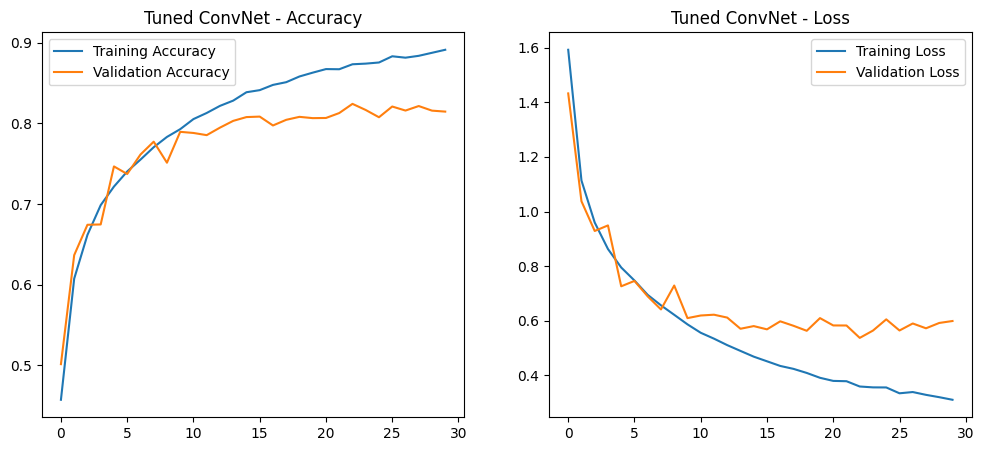

In [ ]:
test_loss_tuned, test_acc_tuned = model_tuned.evaluate(x_test, y_test)
print(f"Tuned Model Test Accuracy: {test_acc_tuned:.4f}")

plot_history(history_tuned, title="Tuned ConvNet")

In [13]:
print("\nComparison Summary:")
print(f"Baseline Test Accuracy: {test_acc:.4f}")
print(f"Tuned Model Test Accuracy: {test_acc_tuned:.4f}")


Comparison Summary:
Baseline Test Accuracy: 0.7971


NameError: name 'test_acc_tuned' is not defined